<a href="https://colab.research.google.com/github/Pakryeongmi/python_bigdata/blob/main/%EB%B9%84%ED%8A%B82205_%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_03_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

In [ ]:
import pandas as pd

## Column 표현 - Series

In [ ]:
se = pd.Series([4,1,2,3]) #인덱스를 자동으로 부여(왼쪽줄에)
print(se)

0    4
1    1
2    2
3    3
dtype: int64


In [ ]:
print(se.index)

RangeIndex(start=0, stop=4, step=1)


In [ ]:
print(se.values)

[4 1 2 3]


In [ ]:
se = pd.Series([5,1,7,4], index = ['a', 'b', 'c', 'd'])
print(se)

a    5
b    1
c    7
d    4
dtype: int64


In [ ]:
print(se.index)

Index(['a', 'b', 'c', 'd'], dtype='object')


In [ ]:
se.index = ['1', '8', 'k', 'b'] #인덱스값 변경
print(se)

1    5
8    1
k    7
b    4
dtype: int64


In [ ]:
print(se['k']) #인덱스 값에 해당하는 values(값)을 반환

7


In [ ]:
filter_se = se % 2 == 0
print(filter_se)

1    False
8    False
k    False
b     True
dtype: bool


In [ ]:
evens = se[filter_se] #filter에서 true값만 반환
print(evens)

b    4
dtype: int64


In [ ]:
evens = se[se % 2 == 0] #filter를 쓰지 않고 바로 사용(간편)
print(evens)

b    4
dtype: int64


In [ ]:
print(se)
se = se + 2
print(se)

1    5
8    1
k    7
b    4
dtype: int64
1    7
8    3
k    9
b    6
dtype: int64


In [ ]:
k_e_dic = {'하나':'one', '둘':'two', '셋':'three'}
se = pd.Series(k_e_dic)
print(se)

하나      one
둘       two
셋     three
dtype: object


In [ ]:
import numpy as np

In [ ]:
se = pd.Series([1, np.nan, None, 5]) #결측값 - np.nan, None 
print(se)

0    1.0
1    NaN
2    NaN
3    5.0
dtype: float64


In [ ]:
print(se.isnull()) #결측값인지 아닌지 판단(True - 결측값)

0    False
1     True
2     True
3    False
dtype: bool


In [ ]:
se_nu = se[se.isnull()]
print(se_nu)

1   NaN
2   NaN
dtype: float64


In [ ]:
se.unique()

array([ 1., nan,  5.])

In [ ]:
se.value_counts()

1.0    1
5.0    1
dtype: int64

In [ ]:
se.describe() #데이터의 분석

count    2.000000
mean     3.000000
std      2.828427
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64

## DataFrame

In [ ]:
df = pd.DataFrame([['홍길동', 90, 80, 70], ['강감찬', 80, 78, 90]])
print(df)

     0   1   2   3
0  홍길동  90  80  70
1  강감찬  80  78  90


In [ ]:
df

,0,1,2,3
0,홍길동,90,80,70
1,강감찬,80,78,90


In [ ]:
df.index #세로

RangeIndex(start=0, stop=2, step=1)

In [ ]:
df.columns #가로

RangeIndex(start=0, stop=4, step=1)

In [ ]:
df.index = [1, 2]
df.columns = ['이름', '국어', '영어', '수학']
df

,이름,국어,영어,수학
1,홍길동,90,80,70
2,강감찬,80,78,90


In [ ]:
df.values #데이터(값)

array([['홍길동', 90, 80, 70],
       ['강감찬', 80, 78, 90]], dtype=object)

In [ ]:
df = pd.DataFrame([['홍길동', 27, '율도국'],['강감찬', 88, '서울']], index = [1, 2], columns = ['이름', '나이', '주소'])
df

,이름,나이,주소
1,홍길동,27,율도국
2,강감찬,88,서울


In [ ]:
ns = df['나이']
ns

1    27
2    88
Name: 나이, dtype: int64

In [ ]:
print(type(ns))

<class 'pandas.core.series.Series'>


In [ ]:
df.isnull()

,이름,나이,주소
1,False,False,False
2,False,False,False


In [ ]:
df.describe() #데이터 상세정보

,나이
count,2.000000
mean,57.500000
std,43.133514
min,27.000000
25%,42.250000
50%,57.500000
75%,72.750000
max,88.000000


In [ ]:
df.value_counts()

이름   나이  주소 
강감찬  88  서울     1
홍길동  27  율도국    1
dtype: int64

In [ ]:
sub_df = df[['이름', '주소']] #서브데이터프레임 반환(여러개의 컬럼들을 추출할 경우) - [['values', 'values']]
sub_df

,이름,주소
1,홍길동,율도국
2,강감찬,서울


In [ ]:
print(sub_df)

    이름   주소
1  홍길동  율도국
2  강감찬   서울


In [ ]:
df.info() #Series에는 info가 없고 df에는 unique가 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      2 non-null      object
 1   나이      2 non-null      int64 
 2   주소      2 non-null      object
dtypes: int64(1), object(2)
memory usage: 64.0+ bytes


In [ ]:
del df['나이'] #컬럼 삭제
df

,이름,주소
1,홍길동,율도국
2,강감찬,서울


## 실질적 사용 예

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.head() #앞에서부터 5개 출력

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.tail() #뒤에서부터 5개 출력

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [ ]:
df.tail(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
df[50:55] #인덱스가 50에서부터 54까지 출력

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


In [ ]:
df.loc[50:55] #인덱스가 50에서부터 55까지 출력

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
55,5.7,2.8,4.5,1.3,Versicolor


In [ ]:
df['sepal.width'] #[]안에 컬럼 내용을 적어줘야함

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal.width, Length: 150, dtype: float64

In [ ]:
df.loc[0] #loc는 해당하는 low(인덱스) 내용을 반환

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [ ]:
df.iloc[0] #해당하는 low(인덱스) 내용을 반환

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [ ]:
df['petal.length'][0] #해당하는 컬럼에서 인덱스가 0번째인 내용 반환

1.4

In [ ]:
df.loc[0]['petal.length'] #인덱스가 0번째에서 해당하는 컬럼 내용(petal.length) 반환

1.4

In [ ]:
df.iloc[0]['petal.length']

1.4

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal.length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal.width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal.length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal.width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
variety,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,...,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica


## 데이터 통합하기

In [ ]:
data = {'국어':[100,38,45,90], #키(국어, 영어)가 컬럼으로 들어감
        '영어':[90,80,75,80]}
df = pd.DataFrame(data)
df

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80


In [ ]:
from datetime import date
data2 = {'국어':[100,38], 
        '영어':[90,80]}
df2 = pd.DataFrame(data2)
df2

,국어,영어
0,100,90
1,38,80


In [ ]:
rdf = df.append(df2) #
print(df)
print(df2)
print(rdf)

    국어  영어
0  100  90
1   38  80
2   45  75
3   90  80
    국어  영어
0  100  90
1   38  80
    국어  영어
0  100  90
1   38  80
2   45  75
3   90  80
0  100  90
1   38  80


In [ ]:
df.append(df2)
df2

,국어,영어
0,100,90
1,38,80


In [ ]:
rdf = df.append(df2)
rdf

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80
0,100,90
1,38,80


In [ ]:
df.append(df2) #append로 병합된 것처럼 보이지만 실제로는 붙어서 출력된 것

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80
0,100,90
1,38,80


In [ ]:
df2 

,국어,영어
0,100,90
1,38,80


In [ ]:
rdf2 = df.append(df2, ignore_index=True) #기존의 인덱스를 무시하고 다시 자동으로 인덱스 부여해라
rdf2

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80
4,100,90
5,38,80


In [ ]:
data3 = {'수학':[90,85,np.nan,88]}
df3 = pd.DataFrame(data3)
df3

,수학
0,90.0
1,85.0
2,NaN
3,88.0


In [ ]:
df

,국어,영어
0,100,90
1,38,80
2,45,75
3,90,80


In [ ]:
rdf3 = df.join(df3) #컬럼 추가
rdf3

,국어,영어,수학
0,100,90,90.0
1,38,80,85.0
2,45,75,NaN
3,90,80,88.0


In [ ]:
rdf3.isnull()

,국어,영어,수학
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,False


In [ ]:
rdf4 = rdf3.dropna() #결측값이 있는 low를 삭제
rdf4

,국어,영어,수학
0,100,90,90.0
1,38,80,85.0
3,90,80,88.0


In [ ]:
rdf5 = rdf3.fillna(0) #결측값을 0.0으로 변환
rdf5

,국어,영어,수학
0,100,90,90.0
1,38,80,85.0
2,45,75,0.0
3,90,80,88.0


In [ ]:
df = pd.DataFrame([[1,np.nan,3,4],[np.nan,np.nan,np.nan,np.nan],[3,4,1,1]])
df

,0,1,2,3
0,1.0,NaN,3.0,4.0
1,NaN,NaN,NaN,NaN
2,3.0,4.0,1.0,1.0


In [ ]:
df2 = df.dropna() #하나라도 결측값(np.nan)이 있으면 low 삭제(디폴트값)
df2

,0,1,2,3
2,3.0,4.0,1.0,1.0


In [ ]:
df3 = df.dropna(how='all') #전부 다 결측값이면 low 삭제
df3

,0,1,2,3
0,1.0,NaN,3.0,4.0
2,3.0,4.0,1.0,1.0


In [ ]:
df

,0,1,2,3
0,1.0,NaN,3.0,4.0
1,NaN,NaN,NaN,NaN
2,3.0,4.0,1.0,1.0


In [ ]:
df.iloc[1][0] = 2
df

,0,1,2,3
0,1.0,NaN,3.0,4.0
1,2.0,NaN,NaN,NaN
2,3.0,4.0,1.0,1.0


In [ ]:
df2 = df.fillna(0)
df2

,0,1,2,3
0,1.0,0.0,3.0,4.0
1,2.0,0.0,0.0,0.0
2,3.0,4.0,1.0,1.0


In [ ]:
df2 = df.dropna()
df2

,0,1,2,3
2,3.0,4.0,1.0,1.0


In [ ]:
df3 = df.dropna(axis=1) #결측값이 있는 컬럼(행) 제거
df3

,0
0,1.0
1,2.0
2,3.0


## 공분산

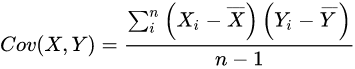

In [ ]:
def cov(x, y):
    dx = x-x.mean()
    dy = y-y.mean()
    return np.dot(dx, dy)/(len(x)-1)

In [ ]:
print('공분산(키, 몸무게):', cov(heights, weights))

공분산(키, 몸무게): 39.242280393860234


In [ ]:
print('공분산(키, 몸무게):', np.cov(heights, weights)[1])

공분산(키, 몸무게): [39.24228039 35.73133544]


## 상관 관계

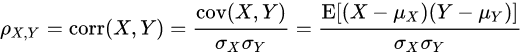

In [ ]:
heights = np.random.normal(161.4, 7, 200) #키는 161.4, 표준편차 7, 표본 개수 200개 생성
bmi = np.random.normal(23, 1, 200) #체질량 지수 23, 표준편차 1, 표본 개수 200개 생성
weights = bmi*(heights**2)/10000 #몸무게

In [ ]:
print('===키')
print('평균    :', heights.mean())
print('중간값  :', np.median(heights))
print('1/4분위 :', np.quantile(heights, 0.25))
print('1/2분위 :', np.quantile(heights, 0.5)) #중간값과 같음
print('3/4분위 :', np.quantile(heights, 0.75))
hist, _ = np.histogram(heights, bins = [x for x in range(0, 250, 5)])
mi = hist.argmax()
print('최빈구간:', mi * 5 + 2.5)

===키
평균    : 161.56715967867217
중간값  : 161.6520524233053
1/4분위 : 156.08966293897203
1/2분위 : 161.6520524233053
3/4분위 : 166.63039028430163
최빈구간: 157.5


In [ ]:
def corr(x, y):
    std_x = x.std()
    std_y = y.std()
    if std_x > 0 and std_y > 0:
        return cov(x, y)/std_x/std_y
    else:
        return 0

In [ ]:
print('상관관계(키, 몸무게):', corr(heights, weights))

상관관계(키, 몸무게): 0.8971676992606572


In [ ]:
se_he = pd.Series(heights)
se_we = pd.Series(weights)
print('상관관계(키, 몸무게):', se_he.corr(se_we))

상관관계(키, 몸무게): 0.8926818607643539


## 확률
조건부 사건, 독립 사건

In [ ]:
pa = 1/2
pb = 1/6
print(f'P(a) = {pa:.2f}')
print(f'P(b) = {pb:.2f}')

P(a) = 0.50
P(b) = 0.17


In [ ]:
print('P(a and b) = P(a|b) * P(b)')

P(a and b) = P(a|b) * P(b)


In [ ]:
print('a와 b가 독립 사건일 때 P(a|b) = P(a)')
pab = pa * pb
print(f'P(a and b) = P(a|b) * P(b) = P(a) * P(b) = {pa * pb:.2f}')
print(f'P(a and b) = P(a|b) * P(b) = P(a) * P(b) = {pab:.2f}')

a와 b가 독립 사건일 때 P(a|b) = P(a)
P(a and b) = P(a|b) * P(b) = P(a) * P(b) = 0.08
P(a and b) = P(a|b) * P(b) = P(a) * P(b) = 0.08


In [ ]:
import math
def sigmoid(x):
    return math.exp(x)/(1+math.exp(x))

In [ ]:
xs = [x/100 for x in range(-500, 500)]
print(xs)

[-5.0, -4.99, -4.98, -4.97, -4.96, -4.95, -4.94, -4.93, -4.92, -4.91, -4.9, -4.89, -4.88, -4.87, -4.86, -4.85, -4.84, -4.83, -4.82, -4.81, -4.8, -4.79, -4.78, -4.77, -4.76, -4.75, -4.74, -4.73, -4.72, -4.71, -4.7, -4.69, -4.68, -4.67, -4.66, -4.65, -4.64, -4.63, -4.62, -4.61, -4.6, -4.59, -4.58, -4.57, -4.56, -4.55, -4.54, -4.53, -4.52, -4.51, -4.5, -4.49, -4.48, -4.47, -4.46, -4.45, -4.44, -4.43, -4.42, -4.41, -4.4, -4.39, -4.38, -4.37, -4.36, -4.35, -4.34, -4.33, -4.32, -4.31, -4.3, -4.29, -4.28, -4.27, -4.26, -4.25, -4.24, -4.23, -4.22, -4.21, -4.2, -4.19, -4.18, -4.17, -4.16, -4.15, -4.14, -4.13, -4.12, -4.11, -4.1, -4.09, -4.08, -4.07, -4.06, -4.05, -4.04, -4.03, -4.02, -4.01, -4.0, -3.99, -3.98, -3.97, -3.96, -3.95, -3.94, -3.93, -3.92, -3.91, -3.9, -3.89, -3.88, -3.87, -3.86, -3.85, -3.84, -3.83, -3.82, -3.81, -3.8, -3.79, -3.78, -3.77, -3.76, -3.75, -3.74, -3.73, -3.72, -3.71, -3.7, -3.69, -3.68, -3.67, -3.66, -3.65, -3.64, -3.63, -3.62, -3.61, -3.6, -3.59, -3.58, -3.57, -3.56,

In [ ]:
ys = [sigmoid(x) for x in xs]
print(ys)

[0.006692850924284856, 0.006759660510713249, 0.006827132422138159, 0.0068952731326461444, 0.0069640891777620895, 0.007033587154995159, 0.007103773724388777, 0.007174655609074737, 0.007246239595831428, 0.0073185325356462235, 0.007391541344281971, 0.0074652730028476905, 0.007539734558373393, 0.007614933124389156, 0.0076908758815083305, 0.007767570078015002, 0.007845023030455632, 0.007923242124234984, 0.00800223481421624, 0.008082008625325397, 0.008162571153159897, 0.008243930064601564, 0.008326093098433782, 0.008409068065962979, 0.008492862851644354, 0.008577485413711986, 0.008662943784813163, 0.00874924607264706, 0.008836400460607722, 0.008924415208431322, 0.009013298652847822, 0.00910305920823688, 0.009193705367288097, 0.009285245701665574, 0.009377688862676856, 0.009471043581946106, 0.009565318672091674, 0.009660523027407903, 0.009756665624551358, 0.009853755523231264, 0.009951801866904326, 0.010050813883473756, 0.010150800885992722, 0.01025177227337196, 0.010353737531091752, 0.010456

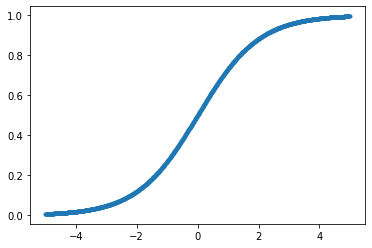

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xs, ys, '.')
plt.show()

## 파일입출력

In [ ]:
cat '/content/drive/MyDrive/data/iris.csv'

"sepal.length","sepal.width","petal.length","petal.width","variety"
5.1,3.5,1.4,.2,"Setosa"
4.9,3,1.4,.2,"Setosa"
4.7,3.2,1.3,.2,"Setosa"
4.6,3.1,1.5,.2,"Setosa"
5,3.6,1.4,.2,"Setosa"
5.4,3.9,1.7,.4,"Setosa"
4.6,3.4,1.4,.3,"Setosa"
5,3.4,1.5,.2,"Setosa"
4.4,2.9,1.4,.2,"Setosa"
4.9,3.1,1.5,.1,"Setosa"
5.4,3.7,1.5,.2,"Setosa"
4.8,3.4,1.6,.2,"Setosa"
4.8,3,1.4,.1,"Setosa"
4.3,3,1.1,.1,"Setosa"
5.8,4,1.2,.2,"Setosa"
5.7,4.4,1.5,.4,"Setosa"
5.4,3.9,1.3,.4,"Setosa"
5.1,3.5,1.4,.3,"Setosa"
5.7,3.8,1.7,.3,"Setosa"
5.1,3.8,1.5,.3,"Setosa"
5.4,3.4,1.7,.2,"Setosa"
5.1,3.7,1.5,.4,"Setosa"
4.6,3.6,1,.2,"Setosa"
5.1,3.3,1.7,.5,"Setosa"
4.8,3.4,1.9,.2,"Setosa"
5,3,1.6,.2,"Setosa"
5,3.4,1.6,.4,"Setosa"
5.2,3.5,1.5,.2,"Setosa"
5.2,3.4,1.4,.2,"Setosa"
4.7,3.2,1.6,.2,"Setosa"
4.8,3.1,1.6,.2,"Setosa"
5.4,3.4,1.5,.4,"Setosa"
5.2,4.1,1.5,.1,"Setosa"
5.5,4.2,1.4,.2,"Setosa"
4.9,3.1,1.5,.2,"Setosa"
5,3.2,1.2,.2,"Setosa"
5.5,3.5,1.3,.2,"Setosa"
4.9,3.6,1.4,.1,"Setosa"
4.4,3,1.3,.2,"Setosa"
5.1,3.4,1.5,.2,"Seto

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df2 = pd.read_table('/content/drive/MyDrive/data/iris.csv', sep=',')
df2

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
df3 = pd.read_table('/content/hjh.abc', sep=':')
df3

,진협,23,99
0,유진,21,98
1,우진,24,101


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/data.csv')
df

,1,강감찬,13,A
0,2,을지문덕,33,B
1,3,홍길동,22,O
2,4,이순신,45,AB


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/data/data.csv', header = None)
df2

,0,1,2,3
0,1,강감찬,13,A
1,2,을지문덕,33,B
2,3,홍길동,22,O
3,4,이순신,45,AB


In [ ]:
df2.columns = ['번호', '이름', '나이', '혈액형']
df2

,번호,이름,나이,혈액형
0,1,강감찬,13,A
1,2,을지문덕,33,B
2,3,홍길동,22,O
3,4,이순신,45,AB


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/data/data.csv', header = None, names = ['번호', '이름', '나이', '혈액형'])
df3

,번호,이름,나이,혈액형
0,1,강감찬,13,A
1,2,을지문덕,33,B
2,3,홍길동,22,O
3,4,이순신,45,AB


In [ ]:
#json 형식의 데이터
jdata = """
{
  "abstract":{
    "count":5,
    "company":"언제나휴일"
  },
  "documents":
  [
    {
      "name":"홍길동",
      "age":"20",
      "addr":"율도국"
    },
    {
      "name":"강감찬",
      "age":"23",
      "addr":"관악"
    },
    {
      "name":"을지문덕",
      "age":"42",
      "addr":"평양"      
    },
    {
      "name":"장언휴",
      "age":"27",
      "addr":"제주"
    },
    {
      "name":"이순신",
      "age":"46",
      "addr":"아산"
    }
  ]
}
"""
jdata

'\n{\n  "abstract":{\n    "count":5,\n    "company":"언제나휴일"\n  },\n  "documents":\n  [\n    {\n      "name":"홍길동",\n      "age":"20",\n      "addr":"율도국"\n    },\n    {\n      "name":"강감찬",\n      "age":"23",\n      "addr":"관악"\n    },\n    {\n      "name":"을지문덕",\n      "age":"42",\n      "addr":"평양"      \n    },\n    {\n      "name":"장언휴",\n      "age":"27",\n      "addr":"제주"\n    },\n    {\n      "name":"이순신",\n      "age":"46",\n      "addr":"아산"\n    }\n  ]\n}\n'

In [ ]:
import json

In [ ]:
result = json.loads(jdata)

In [ ]:
result

{'abstract': {'company': '언제나휴일', 'count': 5},
 'documents': [{'addr': '율도국', 'age': '20', 'name': '홍길동'},
  {'addr': '관악', 'age': '23', 'name': '강감찬'},
  {'addr': '평양', 'age': '42', 'name': '을지문덕'},
  {'addr': '제주', 'age': '27', 'name': '장언휴'},
  {'addr': '아산', 'age': '46', 'name': '이순신'}]}

In [ ]:
df = pd.DataFrame(result['documents'], columns = ['name', 'addr'])
df

,name,addr
0,홍길동,율도국
1,강감찬,관악
2,을지문덕,평양
3,장언휴,제주
4,이순신,아산


In [ ]:
sd = {
    'name':['홍길동', '강감찬', '을지문덕'],
    'age':[27,47,20],
    'addr':['율도국', '관악', '평양']
}
df = pd.DataFrame(sd)
df

,name,age,addr
0,홍길동,27,율도국
1,강감찬,47,관악
2,을지문덕,20,평양


In [ ]:
jdata = df.to_json()
jdata

'{"name":{"0":"\\ud64d\\uae38\\ub3d9","1":"\\uac15\\uac10\\ucc2c","2":"\\uc744\\uc9c0\\ubb38\\ub355"},"age":{"0":27,"1":47,"2":20},"addr":{"0":"\\uc728\\ub3c4\\uad6d","1":"\\uad00\\uc545","2":"\\ud3c9\\uc591"}}'

In [ ]:
path = '/content/drive/MyDrive/data/train_titanic.csv'
data = pd.read_csv(path)

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId : 승객 id
survived :
Pclass : 등급
Name : 이름
Sex : 성별
Age : 나이
SibSp : 가족관계(수평)
Parch : 가족관계(수직)
Ticket : 티켓
Fare : 요금
Cavin : 객실


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
pd = data['PassengerId']
print(pd.value_counts())
print(pd.unique())

In [ ]:
sd = data['Survived']
print(sd.isnull())
print(sd.value_counts())
print(sd.unique())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Survived, Length: 891, dtype: bool
0    549
1    342
Name: Survived, dtype: int64
[0 1]


In [ ]:
nd = data['Name']
nd

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
def get_my_name_foo(ndata):
    ndata = ndata.replace(' ', '') #replace - 이름앞에 있는 공백을 없애기 위해
    _, s = ndata.split(',')
    subs = s.split('.')
    return subs[0]

In [ ]:
get_my_name_foo(nd[0])

'Mr'

In [ ]:
import pandas as pd
my_nd = []
for ndata in nd:
    re = get_my_name_foo(ndata)
    my_nd.append(re)
se = pd.Series(my_nd)
se.value_counts()

Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
dtype: int64

In [ ]:
src = 'abcdef'
for c in src:
    print(c, ord(c) - ord('a'))

a 0
b 1
c 2
d 3
e 4
f 5


In [ ]:
for i in range(10):
    print(i + ord('a'), chr(i + ord('a'))) #ord: 문자값이 가진 숫자값을 반환 / chr: 숫자값을 문자형으로 변환

97 a
98 b
99 c
100 d
101 e
102 f
103 g
104 h
105 i
106 j


## 시각화
plot

In [ ]:
import matplotlib.pyplot as plt

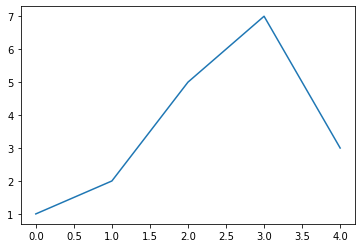

In [ ]:
plt.plot([1,2,5,7,3])
plt.show()

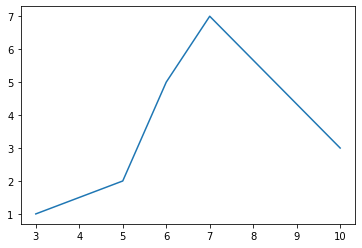

In [ ]:
plt.plot([3,5,6,7,10], [1,2,5,7,3])
plt.show()

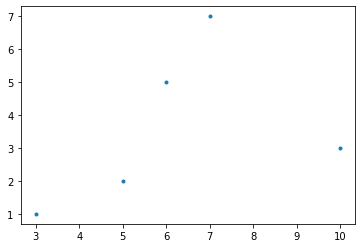

In [ ]:
plt.plot([3,5,6,7,10], [1,2,5,7,3], '.')
plt.show()

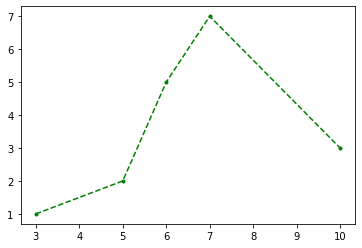

In [ ]:
plt.plot([3,5,6,7,10], [1,2,5,7,3], '.--g')
plt.show()

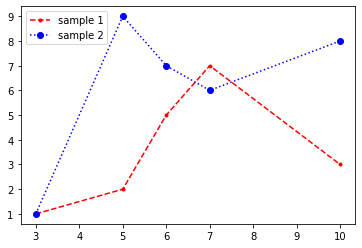

In [ ]:
plt.plot([3,5,6,7,10], [1,2,5,7,3], '.--r', label = 'sample 1')
plt.plot([3,5,6,7,10], [1,9,7,6,8], 'o:b', label = 'sample 2')
plt.legend() #label 값을 화면에 표현해달라
plt.show()

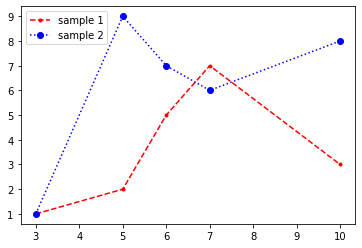

In [ ]:
plt.plot([3,5,6,7,10], [1,2,5,7,3], '.--', color = 'red', label = 'sample 1')
plt.plot([3,5,6,7,10], [1,9,7,6,8], 'o:', color = 'blue', label = 'sample 2')
plt.legend()
plt.show()

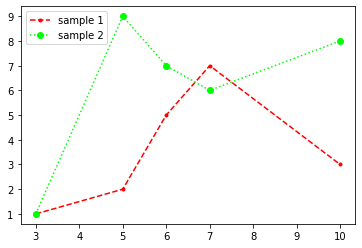

In [ ]:
plt.plot([3,5,6,7,10], [1,2,5,7,3], '.--', color = '#FF0000', label = 'sample 1')
plt.plot([3,5,6,7,10], [1,9,7,6,8], 'o:', color = '#00FF00', label = 'sample 2')
plt.legend() 
plt.show()

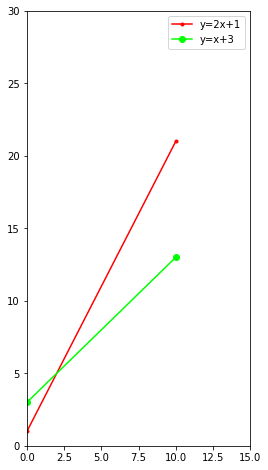

In [ ]:
plt.figure(figsize = (4,8))
plt.plot([0,10], [1,21], '.-', color = '#FF0000', label = 'y=2x+1')
plt.plot([0,10], [3,13], 'o-', color = '#00FF00', label = 'y=x+3')
plt.axis([0,15,0,30])
plt.legend() 
plt.show()